In [1]:
import seaborn as sns
import numpy as np
from numpy import dot
from numpy.linalg import inv, pinv
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import matplotlib

In [13]:
def get_y(X, W, epsilon=True):
    if epsilon:
        epsilon = np.random.normal(0, 0.2, len(X)).reshape(-1,1)
    return np.dot(X, W.T) + epsilon

def visualize(distribution, ax=None, nbins=200):
    cmap = sns.cubehelix_palette(8, start=3, light=0.8, as_cmap=True)
    sns.kdeplot(distribution[:,0], distribution[:,1], cmap=cmap, shade=True, cut=5, ax=ax)

def get_posterior_mean(X, Y, sigma, cov):
    return 1./(sigma**2) * dot(inv(1./(sigma**2) * dot(X.T, X) + inv(cov)), np.dot(X.T, Y)).reshape(-1)

def get_posterior_sigma(X, sigma, cov):
    return inv(1./(sigma**2) * dot(X.T, X) + inv(cov))

Text(0, 0.5, '$w_2$')

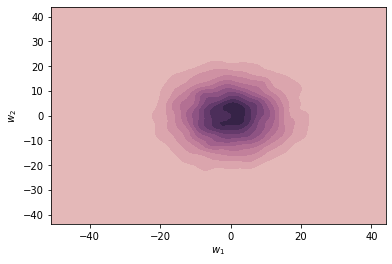

In [14]:
mu = [0, 0]
cov = np.eye(2) * 10**2
sigma = 1
wPrior = np.random.multivariate_normal(mu, cov, 10000)
# fig = plt.figure()
# ax = fig.add_axes([-1, 1, -1, 1])
fig = visualize(wPrior, ax=plt)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
# plt.title('Prior')

In [15]:
x = np.linspace(-1, 1, 201)
w = np.array([0.5, -1.5])
X = np.ones((len(x), 2))
W = w.reshape(1,2)
X[:,0] = x
Y = get_y(X, W)

C:\Users\zth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


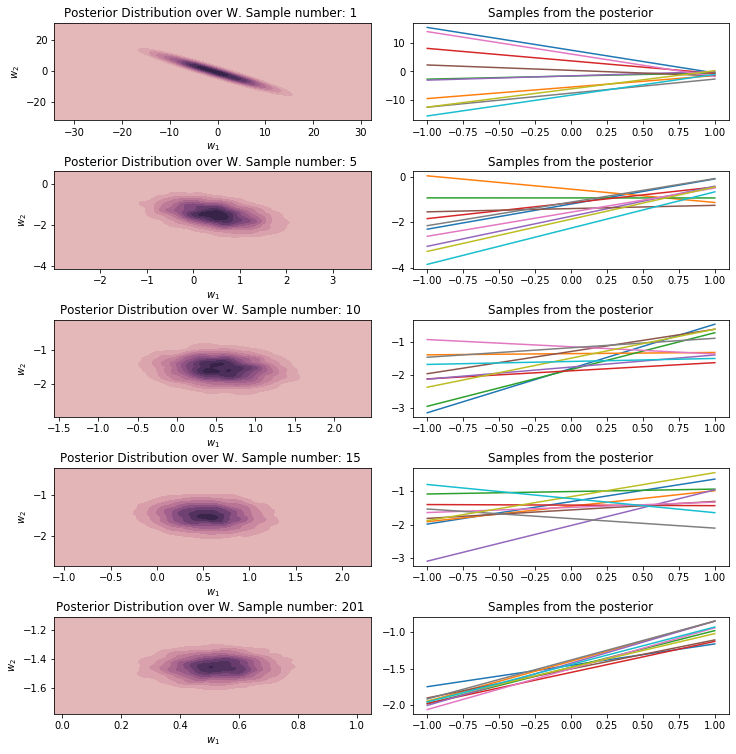

In [17]:
nr_samples = [1, 5, 10, 15, len(X)]
shuffled_idx = np.random.permutation(len(X))
fig, axarr = plt.subplots(len(nr_samples), 2, figsize=(10, 10))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
for i in range(len(nr_samples)):
    nr = nr_samples[i]
    idx = shuffled_idx[:nr]
    samples = X[[idx]]
    labels = Y[idx]
    posterior_mean = get_posterior_mean(samples, labels, sigma, cov)
    posterior_sigma = get_posterior_sigma(samples, sigma, cov)
    dist = np.random.multivariate_normal(posterior_mean, posterior_sigma, 10000)
    visualize(dist, ax=axarr[i,0])
    axarr[i,0].set_xlabel('$w_1$')
    axarr[i,0].set_ylabel('$w_2$')
    axarr[i,0].set_title('Posterior Distribution over W. Sample number: %s ' % str(len(samples)))
    #axarr[i,0].set_xlim(-3, 3)
    #axarr[i,0].set_ylim(-3, 3)
    #plt.show()

    dist_idx = np.random.randint(0, dist.shape[0], 10)
    posterior_sample = dist[dist_idx]
    plt_idx = np.random.permutation(len(X))[0:10]
    postY = get_y(X, posterior_sample, False)
    axarr[i,1].plot(x, postY)
    axarr[i,1].set_title('Samples from the posterior')
    #axarr[i,1].set_xlabel('w1')
    #axarr[i,1].set_ylabel('w2')
    #plt.show()